## Custom Hopfield Images

Creators:
 - Fabian Mikulasch
 - Andreas Schneider
 - Mark Blümel

In [14]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#requires pillow to save gifs
#conda install pillow

In [15]:
def hebbian_rule(X):
    #hebbian learning rule without self-connections
    n_samples, n_features = X.shape
    W = np.zeros((n_features, n_features))
    for i in range(n_features):
        for j in range(n_features):
            if i != j:
                W[i][j] = np.sum(X[:,i] * X[:,j]) / n_samples

    return W

def update(X, W):
    #update the entire state
    activation = np.dot(W, X.T)
    X_new = np.sign(activation).T
    X_new[X_new==0] = -1
    return X_new

def update_single(X, W):
    #update a single neuron
    ind = np.random.choice(X.shape[1])
    activation = np.dot(W[ind,:], X.T)
    X_new = X.copy()
    X_new[0,ind] = np.sign(activation).T
    if X_new[0,ind] == 0:
        X_new[0,ind] = -1
    return X_new

def add_noise(X, noise_level):
    #flip noise_level % bits of the pattern
    noisy_X = X.copy()
    n_samples, n_features = noisy_X.shape
    n_noisy_pixels = int(noise_level * n_samples * n_features)
    idx = np.random.choice(n_samples*n_features, n_noisy_pixels, replace=False)
    noisy_X.ravel()[idx] = -noisy_X.ravel()[idx]
    return noisy_X

In [16]:
def random_patterns(n_patterns,x_pixels, y_pixels):
    # Generate random patterns
    n_pixels = x_pixels * y_pixels
    patterns = np.sign(np.random.rand(n_patterns,n_pixels) - 0.5)
    return patterns

def pattern_from_picture(path):
    im = iio.imread(path)[:,:,0] #only take first color channel
    im_binary = (im/255)*2 - 1
    return im_binary

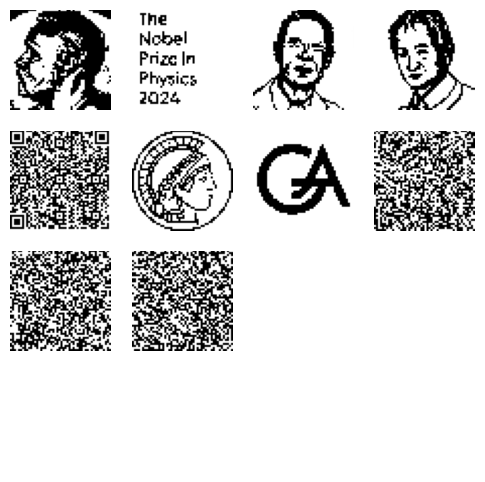

In [17]:
#optionally add random patterns to the pictures
n_patterns = 10
n_pictures = 7
side_length = 50
paths = ['images/nobel.png','images/nobel_prize.png','images/hopfield.png','images/hinton.png',
         'images/qr_priesemann.png','images/minerva.png','images/uni_goe.png']
picture_patterns = np.array([pattern_from_picture(path) for path in paths]).reshape((n_pictures,-1))
r_patterns = random_patterns(n_patterns-n_pictures,side_length,side_length)
patterns = np.concatenate((picture_patterns,r_patterns),axis=0)

#plot all patterns to be stored in the Hopfield network
n_cols = int(np.ceil(np.sqrt(n_patterns)))
n_rows = int(np.ceil(np.sqrt(n_patterns)))
fig, axs = plt.subplots(n_rows, n_cols, figsize=(1.5*n_cols, 1.5*n_rows))
if n_patterns==1:
    axs = np.array([axs])
axs = axs.flatten()
for img, ax in zip(patterns, axs):
    ax.imshow(img.reshape(side_length,side_length), cmap='gray')
for ax in axs:
    ax.axis('off')
plt.show()

Train the network on the patterns. (Hebbian rule)

In [19]:
W = hebbian_rule(patterns)

In [23]:
idx_pattern=3 #chooses pattern that is displayed
n_updates=100 #pixels that are updated between each frame
x_pixels=side_length
# Add Noise to Input
noisy_X = add_noise(patterns[idx_pattern,:][np.newaxis,:], noise_level=0.3)

fig, axs = plt.subplots(1, 1)
#fig.set_tight_layout(True)
im2 = axs.imshow(noisy_X.reshape(x_pixels, -1), cmap='gray')
axs.set_title("Network State")
axs.axis('off')
def update_animation(frame):
    global patterns
    global noisy_X
    #optional code for second subplot
    #similarity = np.dot(patterns, noisy_X.T)
    #most_similar_pattern = patterns[np.argmax(similarity),:]
    #im.set_array(most_similar_pattern.reshape(x_pixels, -1))
    if frame > 2:
        for i in range(n_updates):
            noisy_X = update_single(noisy_X, W)
    im2.set_array(noisy_X.reshape(x_pixels, -1))
    #return [im,im2]
    return [im2]
ani = animation.FuncAnimation(fig, update_animation, frames=300, interval=10, blit=True)
plt.close()

from IPython.display import HTML
HTML(ani.to_jshtml())

#uncomment this to save as gif.
ani.save(f'animations/gif{idx_pattern}.gif', writer='pillow', fps=50)

C:\Users\Mark\AppData\Local\Temp\ipykernel_16576\1774714113.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_new[0,ind] = np.sign(activation).T
C:\Users\Mark\AppData\Local\Temp\ipykernel_16576\1774714113.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_new[0,ind] = np.sign(activation).T


In [9]:
#Optional Code for adding a subplot with the most similar original pattern
# fig, axs = plt.subplots(1, 2)
# fig.set_tight_layout(True)
# im = axs[0].imshow(patterns[0,:].reshape(x_pixels, -1), cmap='gray')
# axs[0].set_title("Most similar pattern")
# axs[0].axis('off')

# im2 = axs[1].imshow(noisy_X.reshape(x_pixels, -1), cmap='gray')
# axs[1].set_title("Network state")
# axs[1].axis('off')

In [10]:
#plot weights (optional)
# W = hebbian_rule(patterns)

# plt.imshow(W, cmap='seismic')
# plt.title("weights")
# plt.xlabel('# neuron')
# plt.ylabel('# neuron')
# plt.colorbar()
# plt.show()